# Introduction to Signal and Image Processing

## 1) Chamfer distances

## 2) Bilinear interpolation

*Note*: This HW has been entirely realized on this Jupyter notebook as approved by the teacher. Some adaptation have been done, especially for the inline display of the graphs.


Thibault Schowing
17.03.2020

# 1) Chamfer distance maps

shapes\circle.png
shapes\rect.png
shapes\spiral.png
shapes\triangle.png


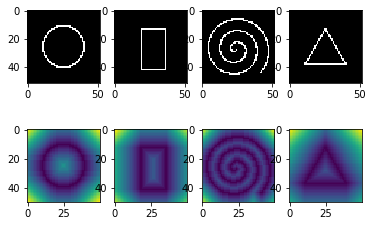

In [17]:
"""

Introduction to Signal and Image Processing
Homework 1

Created on Tue Mar 3, 2020
@author: Thibault Schowing
    
"""

import glob
import os
import numpy as np
import math # for Chamfering Algorithm
import matplotlib.pyplot as plt

from matplotlib.image import imread

# load shapes
shapes = glob.glob(os.path.join('shapes', '*.png'))

def L1(v,w):
    # Mannathan distance 
    return abs(v[0]-w[0]) + abs(v[1] - w[1])

# For every picture
for i, shape in enumerate(shapes):
    print(shape)
    # Convert shape path to np.array
    
    edge_map = imread(shape)
    edge_map = np.array(edge_map)
    
    # Add a 1px border (with 0) to compensate the missing border problem
    original_shape = edge_map.shape
    edge_map = np.pad(edge_map, pad_width=1, mode='constant', constant_values=0)
    
    # Init distance_map with 0 or infinity
    distance_map = np.zeros(edge_map.shape)
    distance_map = np.where(edge_map > (0.),0, np.inf)
    
    ##############################################
    # For every pixel TL to BR
    # goes from top left to bottom right line by line
    # + 1 because we search for the pos -1 vertically and orizontally (avoid out of bound)
    
    for line in range(0+1,distance_map.shape[0]-1):
        for row in range(0+1,distance_map.shape[1]-1):
            # The x pixel is ad pos [line, row]
            # All these pixels px are "q"
            # cpx are the coordinates -> for L1-norm
            # It's not compact but it's readable
            p1 = distance_map[line-1, row-1]
            cp1 = [line-1, row-1]
            p2 = distance_map[line-1, row]
            cp2 = [line-1, row]
            p3 = distance_map[line, row-1]
            cp3 = [line, row-1]
            p4 = x = distance_map[line, row] # this is x so L1(x,p4) is zero
            cp4 = cx = [line, row]
            p5 = distance_map[line+1, row-1]
            cp5 = [line+1, row-1]
            
            distance_map[line,row] = min((L1(cx,cp1) + p1),(L1(cx,cp2) + p2),(L1(cx,cp3) + p3),(L1(cx,cp4) + p4),(L1(cx,cp5) + p5))
    
    # now with BR
    for row in range(distance_map.shape[1]-2,0+1, -1):
        for line in range(distance_map.shape[0]-2,0, -1):
            p1 = distance_map[line-1, row+1]
            cp1 = [line-1, row+1]
            p2 = x = distance_map[line, row]
            cp2 = cx = [line, row]
            p3 = distance_map[line, row+1]
            cp3 = [line, row+1]
            p4 = distance_map[line+1, row]
            cp4 = [line+1, row]
            p5 = distance_map[line+1, row+1]
            cp5 = [line+1, row+1]
            
            distance_map[line,row] = min((L1(cx,cp1) + p1),(L1(cx,cp2) + p2),(L1(cx,cp3) + p3),(L1(cx,cp4) + p4),(L1(cx,cp5) + p5))
    
    # remove the margin (take only the inner part of the table)
    tmp = np.zeros(original_shape)
    tmp = distance_map[1:-1,1:-1]
    distance_map = tmp
    
    ##############################################
    
    # Just gives the position for the final img display
    k, l = 1+i,5+i
    plt.subplot(2, len(shapes), k)
    plt.imshow(edge_map, cmap='gray')
    plt.subplot(2, len(shapes), l)
    plt.imshow(distance_map)#, cmap='gray')



plt.show()

## Boundary problem

The borders are not filled because the pixels "x" use all surounding pixels to be calculated. It would mean to access position -1 in a table which doesn't exist (out of bound). Here it's corrected by adding margins before the image processing and removing them afterward. 

# 2) Bilinear interpolation

...................................................
Testing test_interp()...
done.
Testing interp_1D()....
done.
Testing interp_2D()....
done.
...................................................
...................................................
Testing bilinear interpolation of an image...(grayscale)
('Image shape: ', (480L, 640L))
('Interpolated image shape: ', (960L, 1280L))
done.
Plotting and saving results...
Do not forget to close the plot window --- it happens:) 


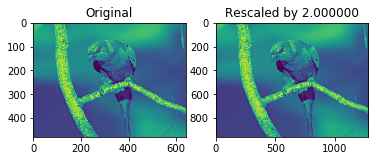

Testing bilinear interpolation of an RGB image...
('Image shape2: ', (356L, 493L, 3L))
('Interpolated image shape2: ', (712L, 986L, 3L))
done.
Plotting and saving results...


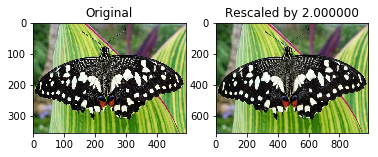

done.


In [11]:
"""

Introduction to Signal and Image Processing
Homework 1

Created on Tue Mar 3, 2020
@author: Thibault Schowing
    
"""


import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# For image saving (not figures)
import scipy.misc


def test_interp():
    # Tests the interp() function with a known input and output
    # Leads to error if test fails

    x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
    y = np.array([0.2, 0.4, 0.6, 0.4, 0.6, 0.8, 1.0, 1.1])
    x_new = np.array((0.5, 2.3, 3, 5.45))
    y_new_solution = np.array([0.2, 0.46, 0.6, 0.69])
    y_new_result = interp(y, x, x_new)
    np.testing.assert_almost_equal(y_new_solution, y_new_result)


def test_interp_1D():
    # Test the interp_1D() function with a known input and output
    # Leads to error if test fails

    y = np.array([0.2, 0.4, 0.6, 0.4, 0.6, 0.8, 1.0, 1.1])
    y_rescaled_solution = np.array([
        0.20000000000000001, 0.29333333333333333, 0.38666666666666671,
        0.47999999999999998, 0.57333333333333336, 0.53333333333333333,
        0.44000000000000006, 0.45333333333333331, 0.54666666666666663,
        0.64000000000000001, 0.73333333333333339, 0.82666666666666677,
        0.91999999999999993, 1.0066666666666666, 1.0533333333333335,
        1.1000000000000001
    ])
    y_rescaled_result = interp_1D(y, 2)
    np.testing.assert_almost_equal(y_rescaled_solution, y_rescaled_result)


def test_interp_2D():
    # Tests interp_2D() function with a known and unknown output
    # Leads to error if test fails

    matrix = np.array([[1, 2, 3], [4, 5, 6]])
    matrix_scaled = np.array([[1., 1.4, 1.8, 2.2, 2.6, 3.],
                              [2., 2.4, 2.8, 3.2, 3.6, 4.],
                              [3., 3.4, 3.8, 4.2, 4.6, 5.],
                              [4., 4.4, 4.8, 5.2, 5.6, 6.]])

    result = interp_2D(matrix, 2)
    np.testing.assert_almost_equal(matrix_scaled, result)


def interp(y_vals, x_vals, x_new):
    # Computes interpolation at the given abscissas
    #
    # Inputs:
    #   x_vals: Given inputs abscissas, numpy array
    #   y_vals: Given input ordinates, numpy array
    #   x_new : New abscissas to find the respective interpolated ordinates, numpy
    #   arrays
    #
    # Outputs:
    #   y_new: Interpolated values, numpy array

    ################### PLEASE FILL IN THIS PART ###############################
    
    # IF x < the smallest value in x_vals -> take the smalest y
    # if x > the biggest value in x_vals -> take the biggest y
    # use np.clip to clip values outside the interval of known x_vals:
    x_new = np.clip(x_new, min(x_vals), max(x_vals))
    
    # Find the insertion points of the new x values. User searchsorted or bisect
    
    x_new_idx = np.searchsorted(x_vals, x_new, side='left')
    
    # Apply formula with lower and upper value
    y_new = np.zeros(x_new.shape[0])
    y_new = y_vals[x_new_idx] + (x_new - x_vals[x_new_idx]) * ((y_vals[x_new_idx - 1] - y_vals[x_new_idx])
                                                               /(x_vals[x_new_idx - 1] - x_vals[x_new_idx]))
    
    return y_new


def interp_1D(signal, scale_factor):
    # Linearly interpolates one dimensional signal by a given saling fcator
    #
    # Inputs:
    #   signal: A one dimensional signal to be samples from, numpy array
    #   scale_factor: scaling factor, float
    #
    # Outputs:
    #   signal_interp: Interpolated 1D signal, numpy array

    ################### PLEASE FILL IN THIS PART ###############################
    
    #linspace
    
    y_vals = signal 
    x_vals = np.linspace(min(y_vals), max(y_vals), len(y_vals))
    x_new = np.linspace(min(y_vals), max(y_vals), len(y_vals)*scale_factor)
    y_new = interp(y_vals, x_vals, x_new)
    signal_interp = y_new
    return signal_interp


def interp_2D(img, scale_factor):
    # Applies bilinear interpolation using 1D linear interpolation
    # It first interpolates in one dimension and passes to the next dimension
    #
    # Inputs:
    #   img: 2D signal/image (grayscale or RGB), numpy array
    #   scale_factor: Scaling factor, float
    #
    # Outputs:
    #   img_interp: interpolated image with the expected output shape, numpy array

    ################### PLEASE FILL IN THIS PART ###############################
    # img
    #[[1,2,3],
    # [4,5,6]]
    
    shape = img.shape
    
    # img is grayscale
    if(len(shape) == 2):
        # for every row
        width_inter = np.array([interp_1D(row, scale_factor) for row in img])
        
        # for every column (tip: transpose of the matrix.col)
        height_inter = np.array([interp_1D(col, scale_factor) for col in width_inter.T])
        
        # We have to transpose again
        img_interp = height_inter.T
    else:
        # img is RGB
        
        #Interpolated empty image / size = original size * scale factor but it must be an integer & 3 RGB channels
        img_interp = np.empty((int(shape[0] * scale_factor), int(shape[1] * scale_factor),3))
        
        # The interpolation has to be done for every RGB channel 
        for i in range(3):
            width_inter = np.array([interp_1D(row, scale_factor) for row in img[:,:,i]])
            height_inter = np.array([interp_1D(col, scale_factor) for col in width_inter.T])
            img_interp[:,:,i] = height_inter.T
            
    
    return img_interp




# Before trying to directly test the bilinear interpolation on an image, we
# test the intermediate functions to see if the functions that are coded run
# correctly and give the expected results.

print('...................................................')
print('Testing test_interp()...')
test_interp()
print('done.')

print('Testing interp_1D()....')
test_interp_1D()
print('done.')

print('Testing interp_2D()....')
test_interp_2D()
print('done.')
print('...................................................')
print('...................................................')

#################################################
#              Bilinear interpolation
#################################################
# set arguments
filename = 'bird.jpg'
filename2 = 'butterfly.jpg'
scale_factor = 2  # Scaling factor


#################################################
#           First image - Grayscale
#################################################

print('Testing bilinear interpolation of an image...(grayscale)')
# Read image as a matrix, get image shapes before and after interpolation
img = (plt.imread(filename)).astype('float')  # need to convert to float
in_shape = img.shape  # Input image shape

# Apply bilinear interpolation
img_int = interp_2D(img, scale_factor)
print("Image shape: ", img.shape)
print("Interpolated image shape: ", img_int.shape)
print('done.')

# Saves the image as an image and not a pyplot figure 
scipy.misc.imsave('TS_bird_rescaled.jpg', img_int)

# Now, we save the interpolated image and show the results
print('Plotting and saving results...')
plt.figure()
plt.imshow(img_int.astype('uint8'))  # Get back to uint8 data type
filename, _ = os.path.splitext(filename)
plt.savefig('{}_rescaled.jpg'.format(filename))
plt.close()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img.astype('uint8'))
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img_int.astype('uint8'))
plt.title('Rescaled by {:2f}'.format(scale_factor))
print('Do not forget to close the plot window --- it happens:) ')
plt.show()






#################################################
#               Second image - RGB
#################################################
print('Testing bilinear interpolation of an RGB image...')
# Read image as a matrix, get image shapes before and after interpolation
img2 = (plt.imread(filename2)).astype('float')  # need to convert to float
in_shape = img.shape  # Input image shape

# Apply bilinear interpolation
img_int2 = interp_2D(img2, scale_factor)
print("Image shape2: ", img2.shape)
print("Interpolated image shape2: ", img_int2.shape)
print('done.')
#################################################

# Saves the image as an image and not a pyplot figure 
scipy.misc.imsave('TS_butterfly_rescaled.jpg', img_int2)

print('Plotting and saving results...')
plt.figure()
plt.imshow(img_int2.astype('uint8'))  # Get back to uint8 data type
filename, _ = os.path.splitext(filename)
plt.savefig('{}_rescaled.jpg'.format(filename))
plt.close()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img2.astype('uint8'))
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img_int2.astype('uint8'))
plt.title('Rescaled by {:2f}'.format(scale_factor))
plt.show()


print('done.')
